
Importing the Dependencies

In [123]:
pip install catboost

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import scipy.stats as stats
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

Data Collection and Processing

In [125]:
# loading the dataset to pandas DataFrame
rainfall_dataset = pd.read_csv('/content/rainfall_prediction.csv')

In [126]:
type(rainfall_dataset)

pandas.core.frame.DataFrame

In [127]:
# first 5 rows of the dataframe
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [128]:
# last 5 rows of the dataframe
rainfall_dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145487,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145488,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145489,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145490,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145491,6/25/2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [129]:
# number of rows and columns
rainfall_dataset.shape

(145492, 23)

In [130]:
# the name of the columns of dataframe
rainfall_dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [131]:
# Describe the data
rainfall_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,144007.000000,144230.000000,142231.000000,82670.000000,75625.000000,135228.000000,143725.000000,142430.000000,142838.000000,140985.000000,130427.000000,130464.000000,89579.000000,86109.000000,143725.000000,141883.000000
mean,12.192618,23.221127,2.360390,5.468232,7.611178,40.034120,14.043472,18.662297,68.877218,51.533170,1017.652011,1015.257660,4.447583,4.509993,16.989288,21.683318
std,6.398749,7.118414,8.477179,4.193704,3.785483,13.606137,8.914624,8.809323,19.029120,20.797524,7.107108,7.037668,2.887137,2.720366,6.488771,6.935991
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [132]:
# Describe the data with transpose
rainfall_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,144007.0,12.192618,6.398749,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144230.0,23.221127,7.118414,-4.8,17.9,22.6,28.2,48.1
Rainfall,142231.0,2.360390,8.477179,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135228.0,40.034120,13.606137,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143725.0,14.043472,8.914624,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142430.0,18.662297,8.809323,0.0,13.0,19.0,24.0,87.0
Humidity9am,142838.0,68.877218,19.029120,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140985.0,51.533170,20.797524,0.0,37.0,52.0,66.0,100.0


In [133]:
# getting imformation about dataset
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145492 entries, 0 to 145491
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145492 non-null  object 
 1   Location       145492 non-null  object 
 2   MinTemp        144007 non-null  float64
 3   MaxTemp        144230 non-null  float64
 4   Rainfall       142231 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135165 non-null  object 
 8   WindGustSpeed  135228 non-null  float64
 9   WindDir9am     134925 non-null  object 
 10  WindDir3pm     141264 non-null  object 
 11  WindSpeed9am   143725 non-null  float64
 12  WindSpeed3pm   142430 non-null  float64
 13  Humidity9am    142838 non-null  float64
 14  Humidity3pm    140985 non-null  float64
 15  Pressure9am    130427 non-null  float64
 16  Pressure3pm    130464 non-null  float64
 17  Cloud9am       89579 non-null

In [134]:
# number of missing values in each column
rainfall_dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1262
Rainfall          3261
Evaporation      62822
Sunshine         69867
WindGustDir      10327
WindGustSpeed    10264
WindDir9am       10567
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55913
Cloud3pm         59383
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3268
dtype: int64

Fill missing values

In [135]:
categorical_features = []
numeric_features = []
features = rainfall_dataset.columns.values.tolist()
for col in features:
    if rainfall_dataset[col].dtype != 'object': 
        numeric_features.append(col)
    else:
        categorical_features.append(col)

print(f'categorical_features: {categorical_features}')
print(f'numeric_features: {numeric_features}')

categorical_features: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numeric_features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [136]:
for col in numeric_features:
    mean = rainfall_dataset[col].mean()
    rainfall_dataset[col] = rainfall_dataset[col].fillna(mean)
    
for col in categorical_features:
    mode = rainfall_dataset[col].mode()[0]
    rainfall_dataset[col] = rainfall_dataset[col].fillna(mode)

rainfall_dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [137]:
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.509993,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447583,4.509993,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447583,2.000000,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447583,4.509993,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [138]:
rainfall_dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145487,6/21/2017,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447583,4.509993,10.1,22.4,No,No
145488,6/22/2017,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447583,4.509993,10.9,24.5,No,No
145489,6/23/2017,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447583,4.509993,12.5,26.1,No,No
145490,6/24/2017,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No
145491,6/25/2017,Uluru,14.9,23.221127,0.0,5.468232,7.611178,W,40.03412,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,No,No


Data Visualization

Numerical Features

In [139]:
# pairplot for weather dataset
sns.pairplot(rainfall_dataset)
print('Pairplot for Weather Dataset')

Output hidden; open in https://colab.research.google.com to view.

Histplot in Rainfall Dataset


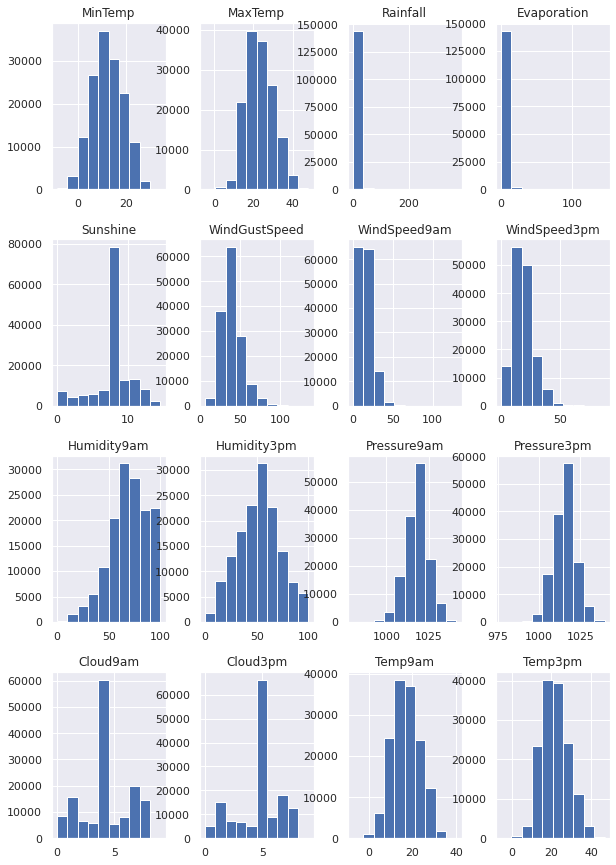

In [140]:
sns.set(style="darkgrid") # hide graph line
rainfall_dataset.hist(figsize=(10,15))
print('Histplot in Rainfall Dataset')
# title = 'Histplot in olympic_dataset\n'.upper()
# plt.title(title, fontsize=20, loc='center')
plt.show()

In [141]:
numeric_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


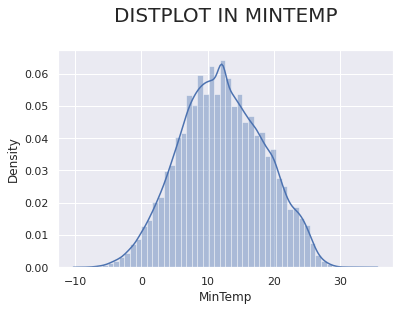

In [142]:
# MinTemp
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['MinTemp'])
title = 'Distplot in MinTemp\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


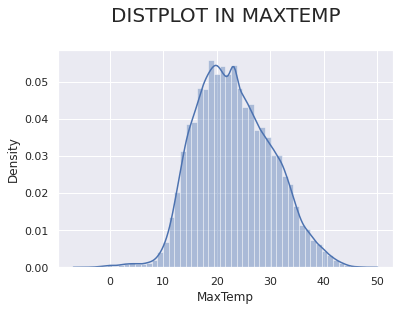

In [143]:
# MaxTemp
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['MaxTemp'])
title = 'Distplot in MaxTemp\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


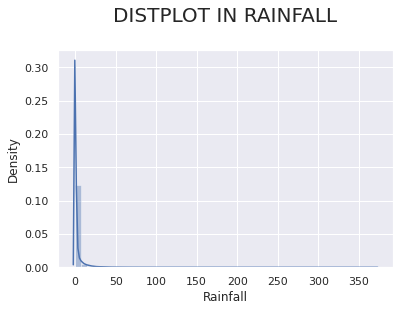

In [144]:
# Rainfall
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Rainfall'])
title = 'Distplot in Rainfall\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


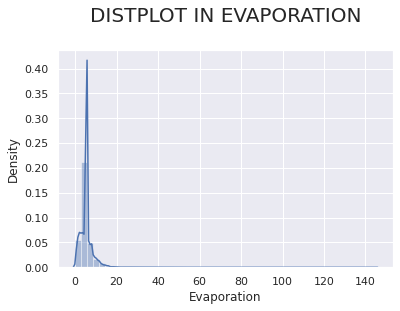

In [145]:
# Evaporation
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Evaporation'])
title = 'Distplot in Evaporation\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


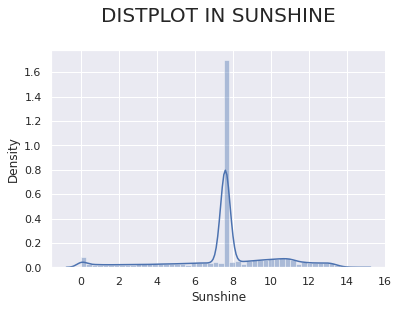

In [146]:
# Sunshine
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Sunshine'])
title = 'Distplot in Sunshine\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


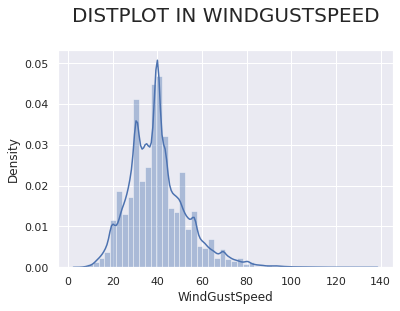

In [147]:
# WindGustSpeed
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['WindGustSpeed'])
title = 'Distplot in WindGustSpeed\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


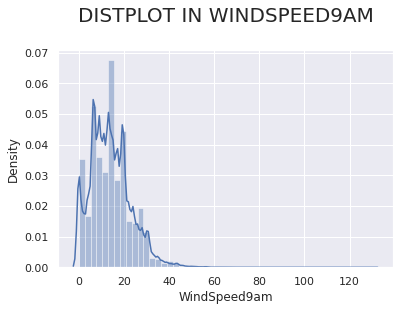

In [148]:
# WindSpeed9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['WindSpeed9am'])
title = 'Distplot in WindSpeed9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


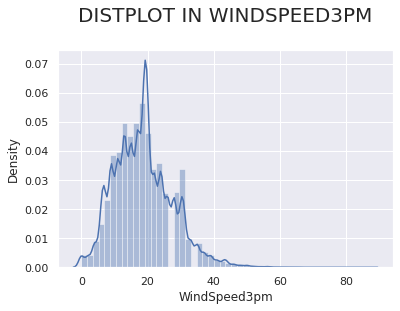

In [149]:
# WindSpeed3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['WindSpeed3pm'])
title = 'Distplot in WindSpeed3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


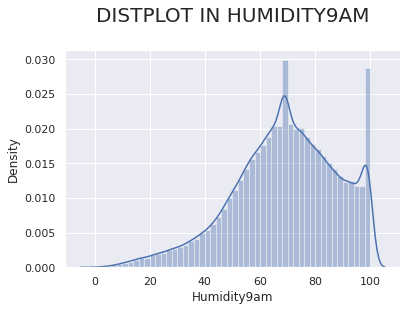

In [150]:
# Humidity9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Humidity9am'])
title = 'Distplot in Humidity9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


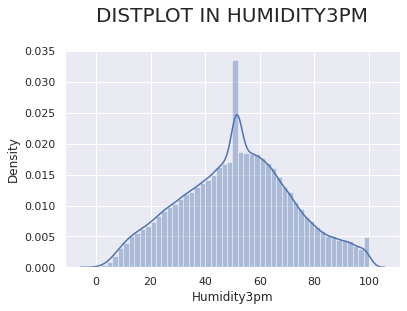

In [151]:
# Humidity3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Humidity3pm'])
title = 'Distplot in Humidity3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


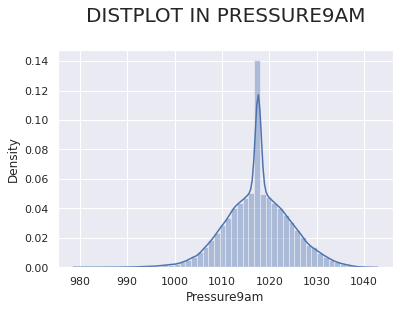

In [152]:
# Pressure9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Pressure9am'])
title = 'Distplot in Pressure9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


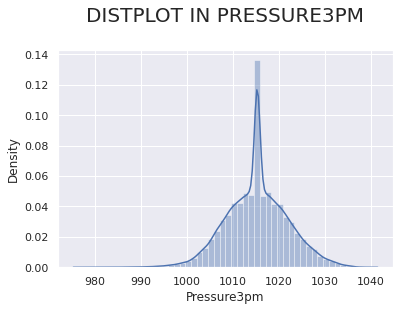

In [153]:
# Pressure3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Pressure3pm'])
title = 'Distplot in Pressure3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


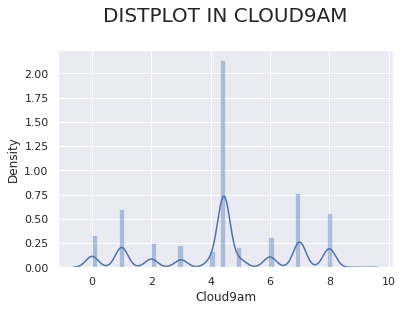

In [154]:
# Cloud9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Cloud9am'])
title = 'Distplot in Cloud9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


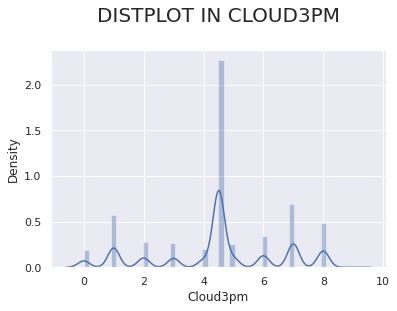

In [155]:
# Cloud3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Cloud3pm'])
title = 'Distplot in Cloud3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


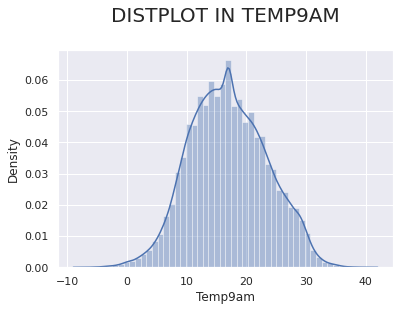

In [156]:
# Temp9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Temp9am'])
title = 'Distplot in Temp9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


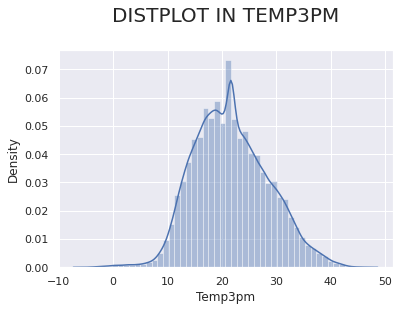

In [157]:
# Temp3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Temp3pm'])
title = 'Distplot in Temp3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [158]:
# For single one Boxplot
#ax = sns.boxplot(x=rainfall_dataset["RainToday"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

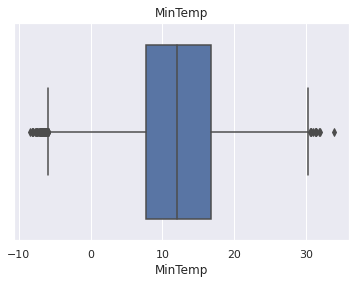

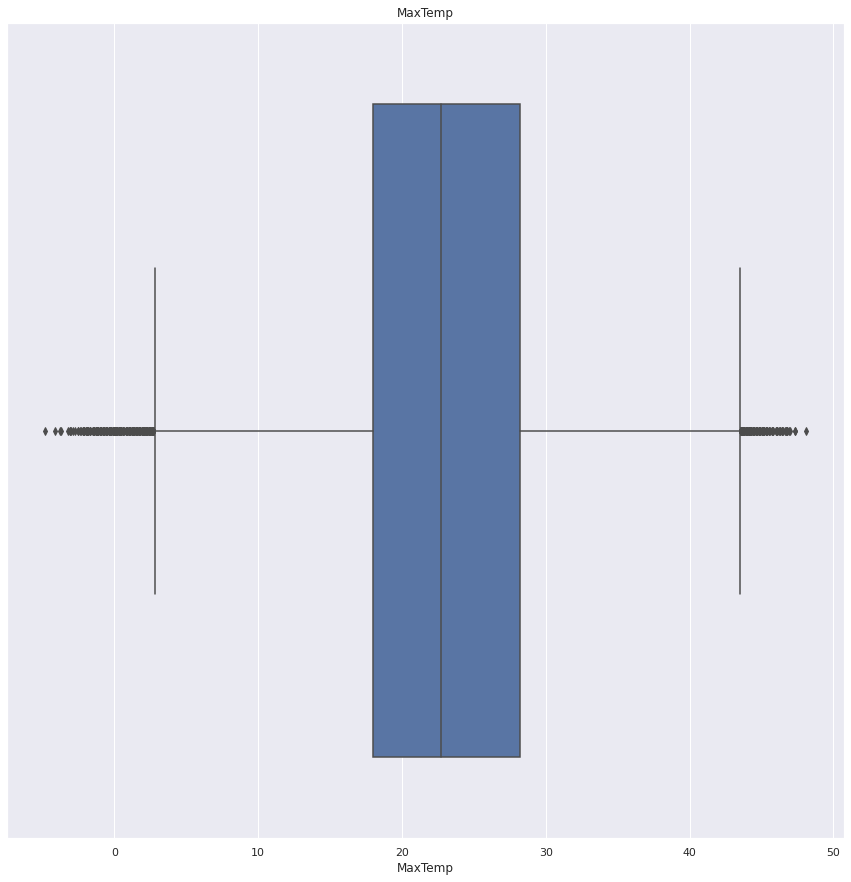

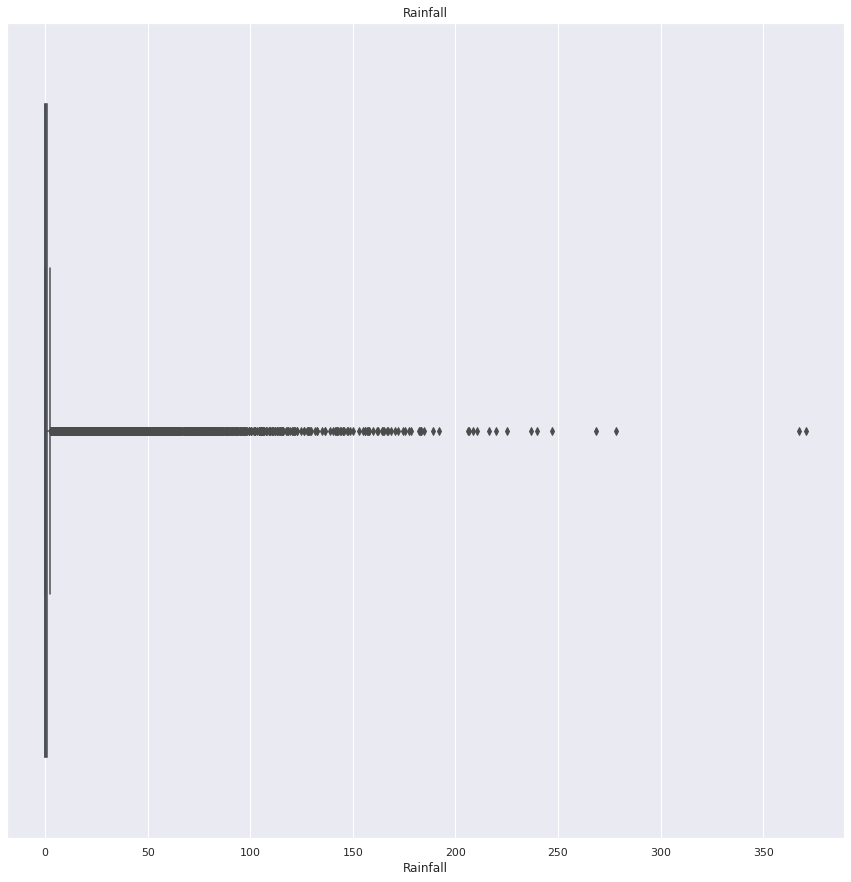

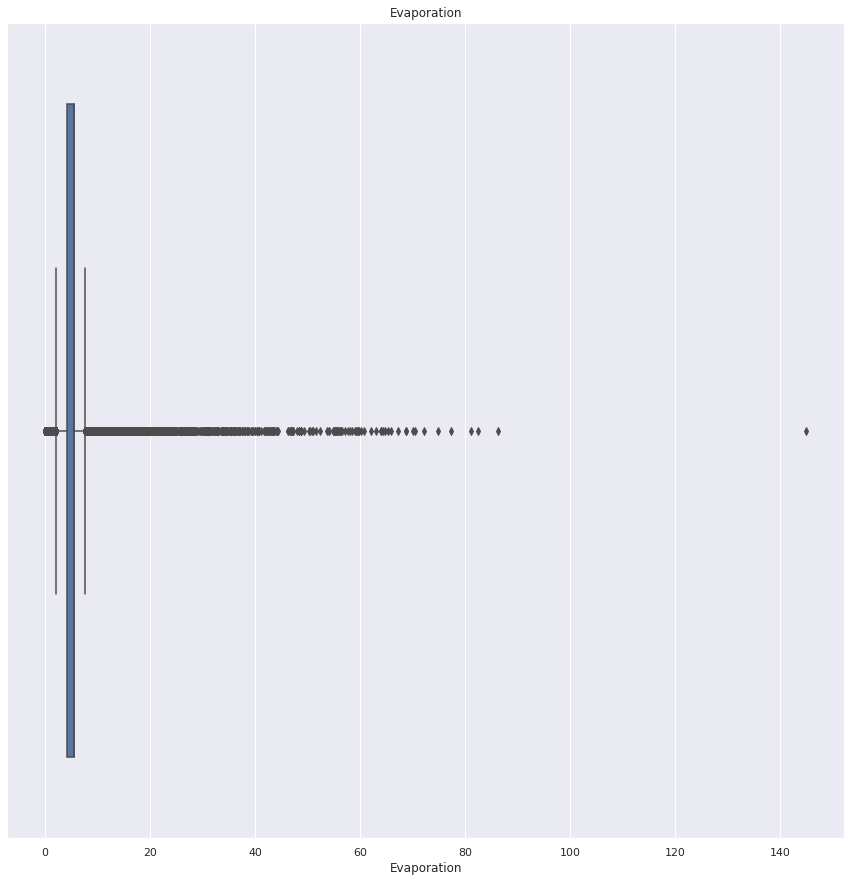

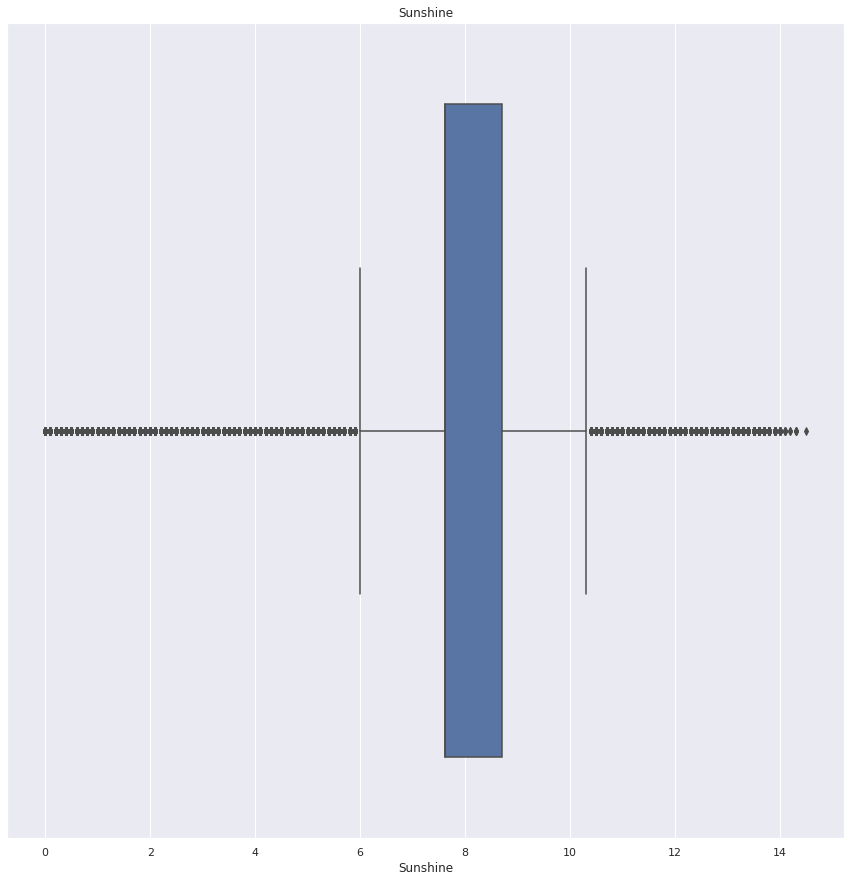

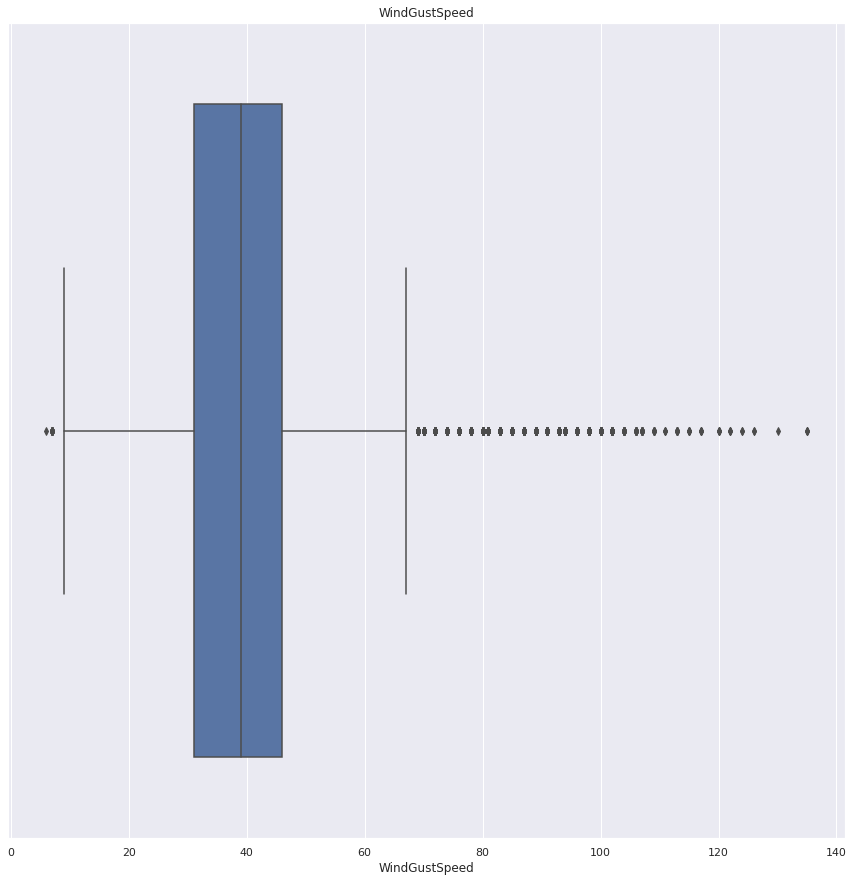

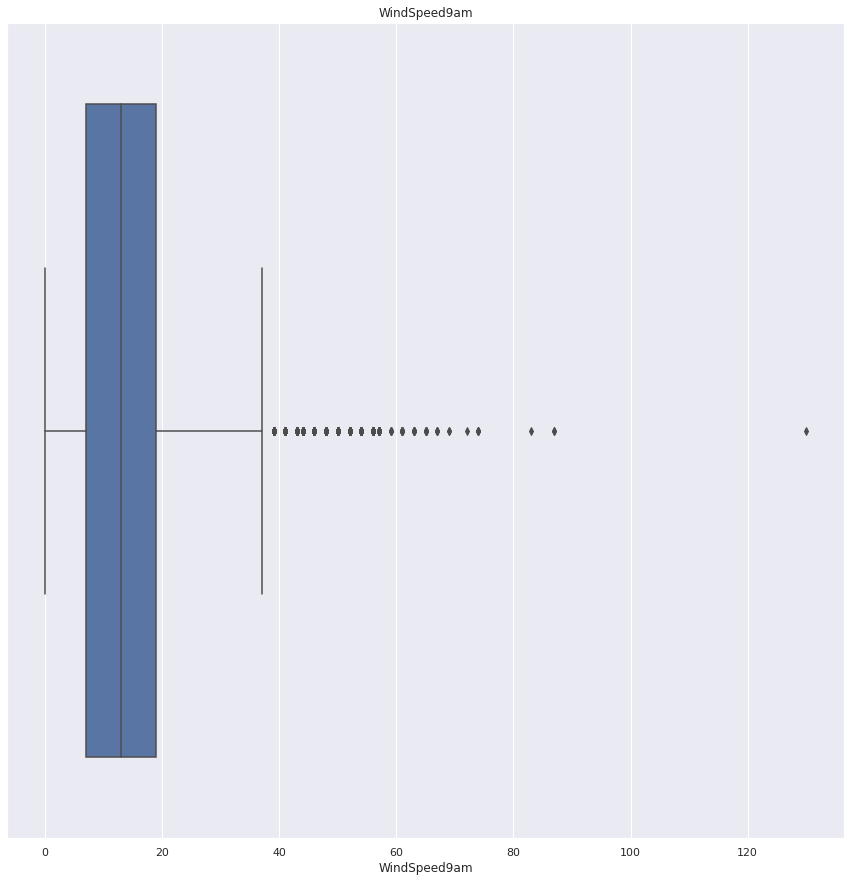

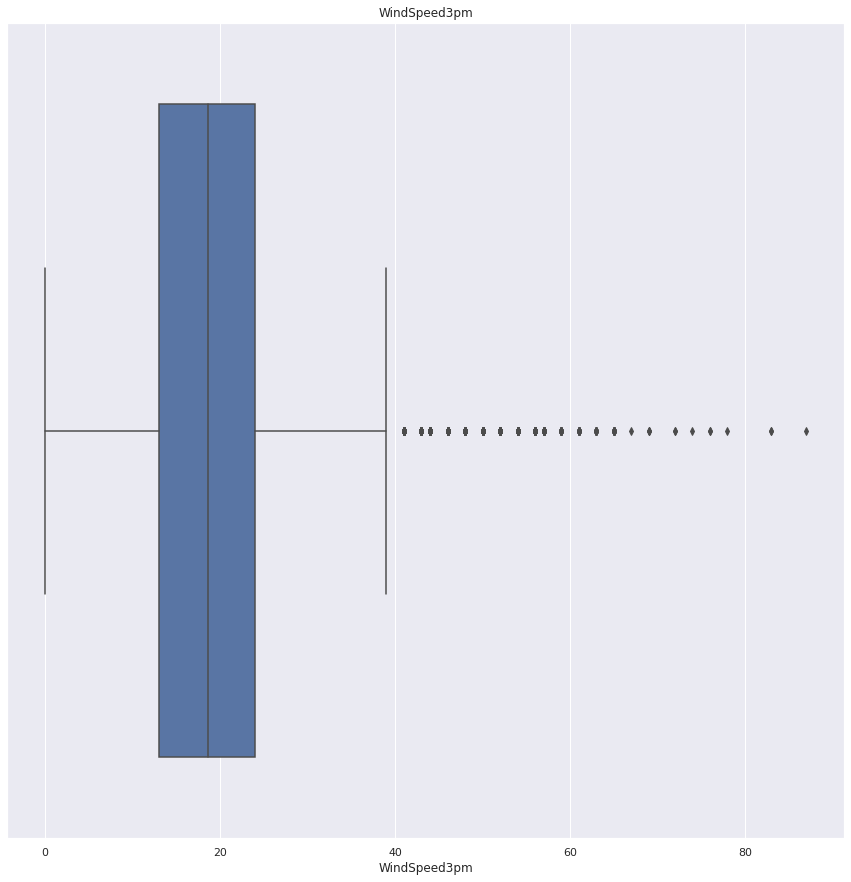

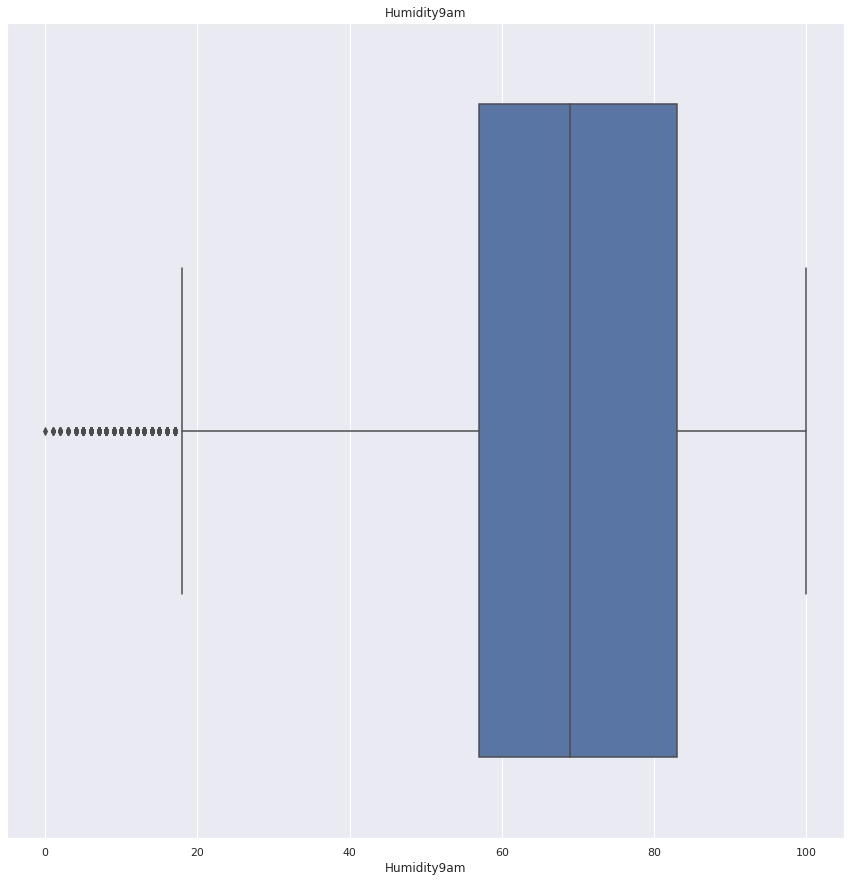

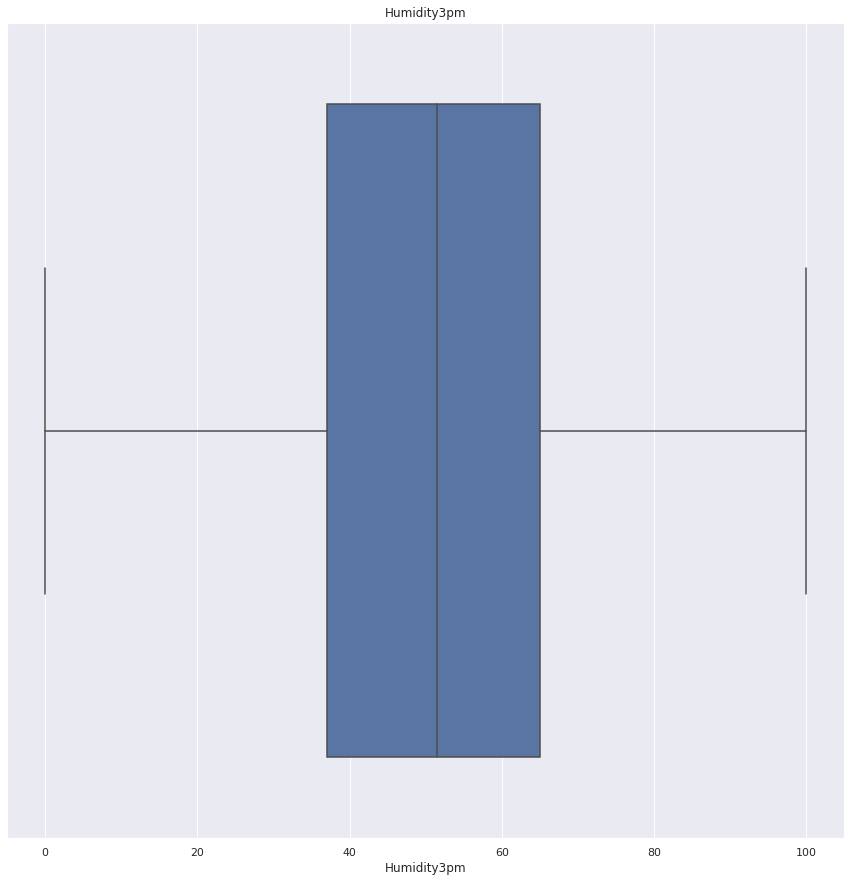

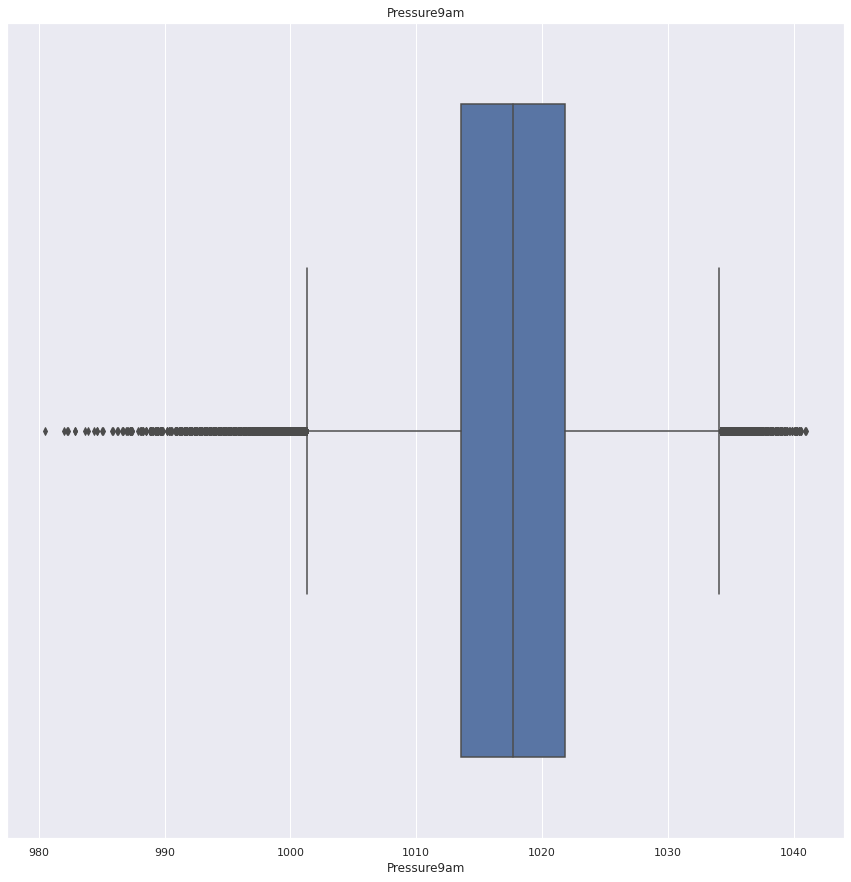

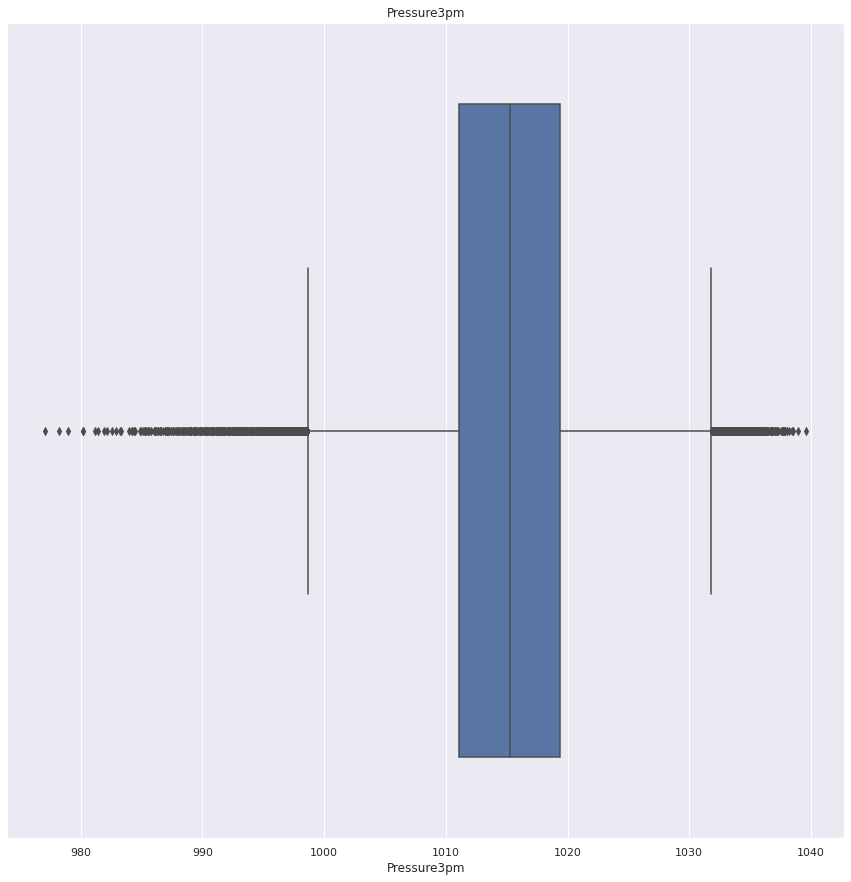

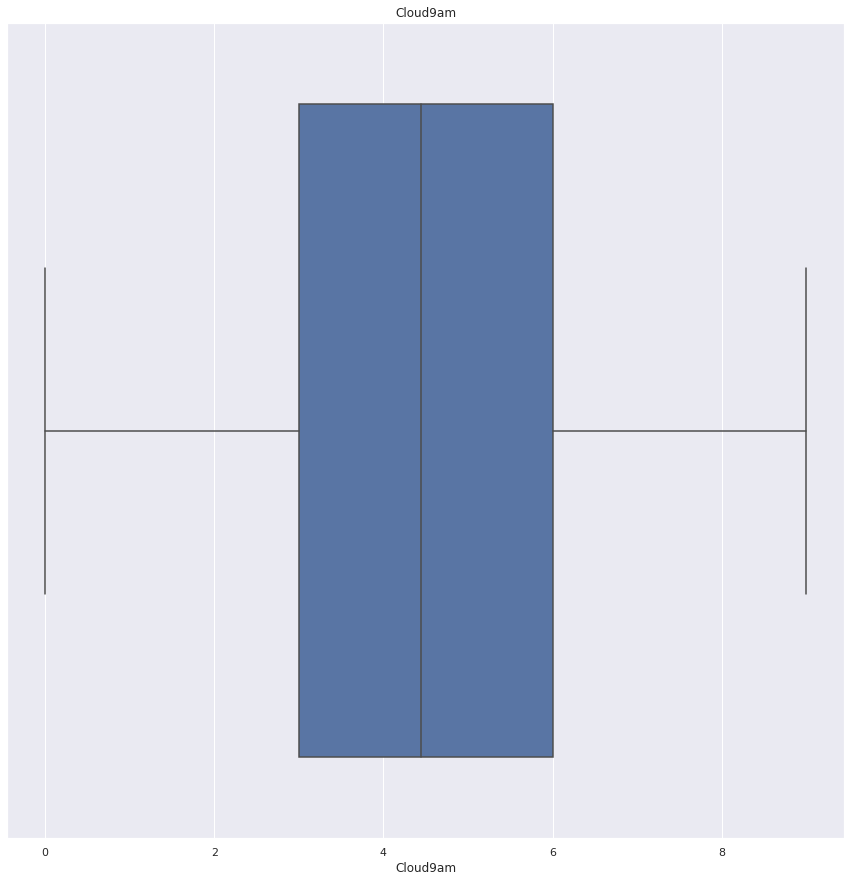

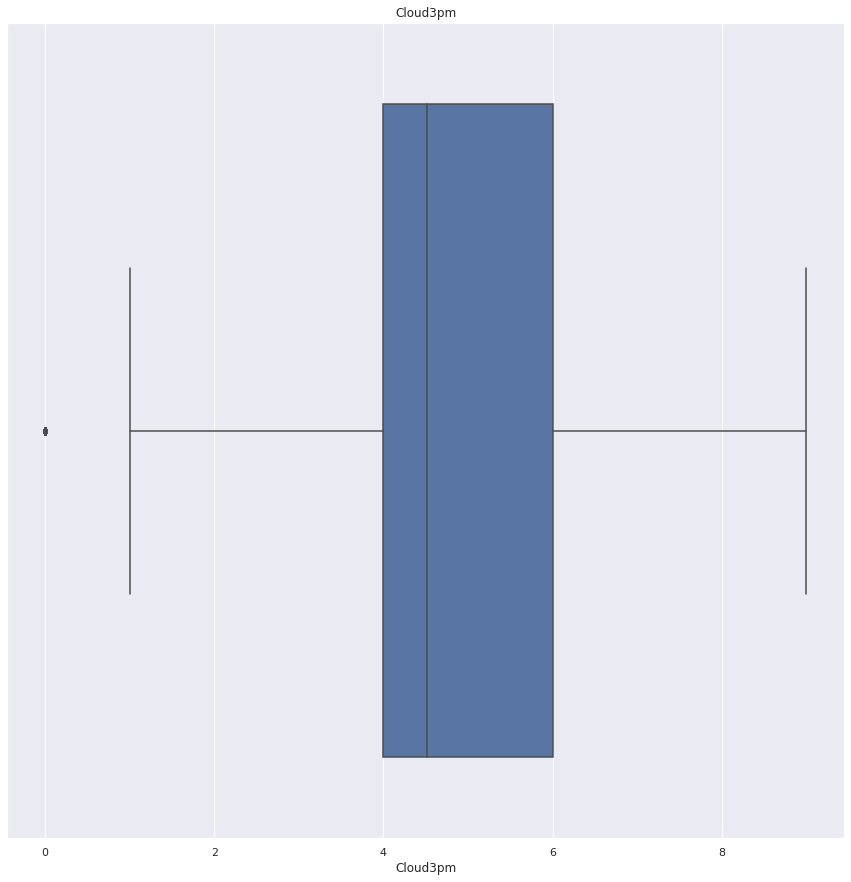

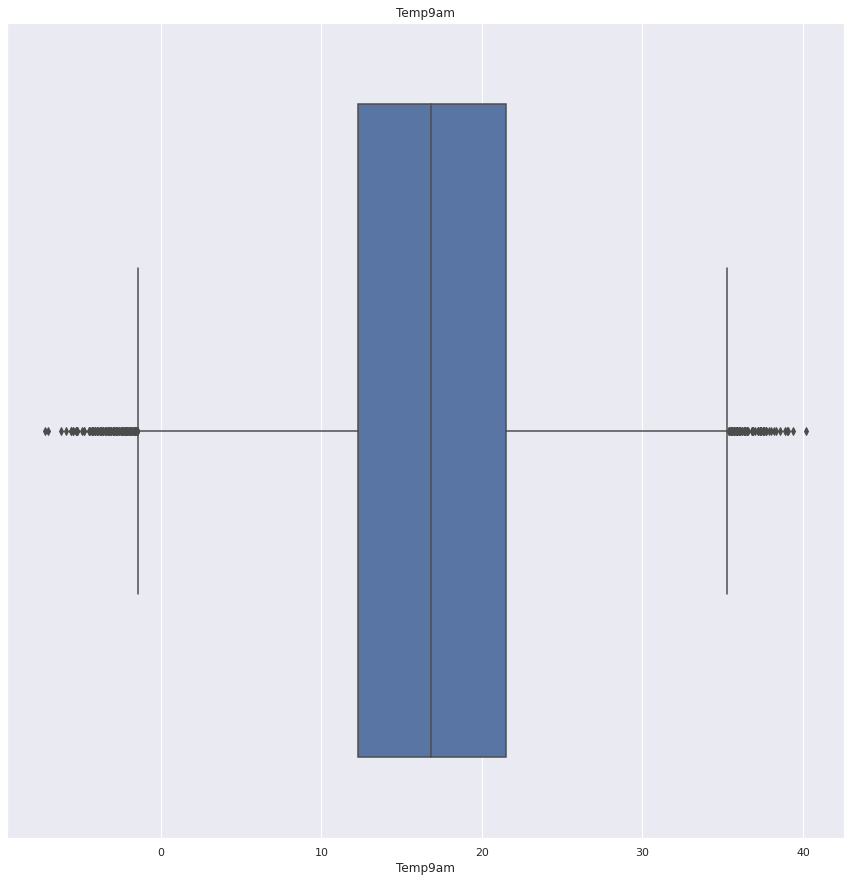

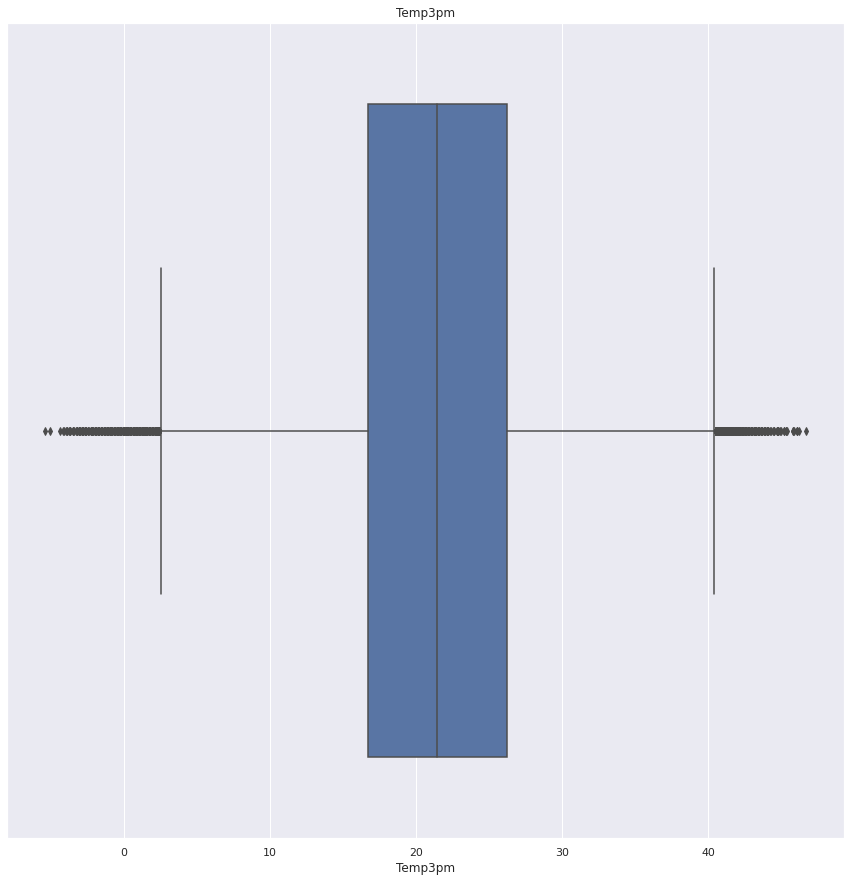

<Figure size 1080x1080 with 0 Axes>

In [159]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in numeric_features:
    data=rainfall_dataset.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

MinTemp


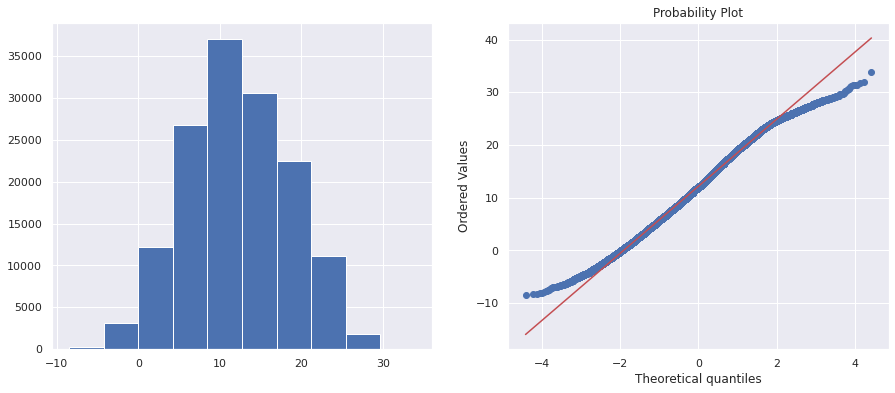

MaxTemp


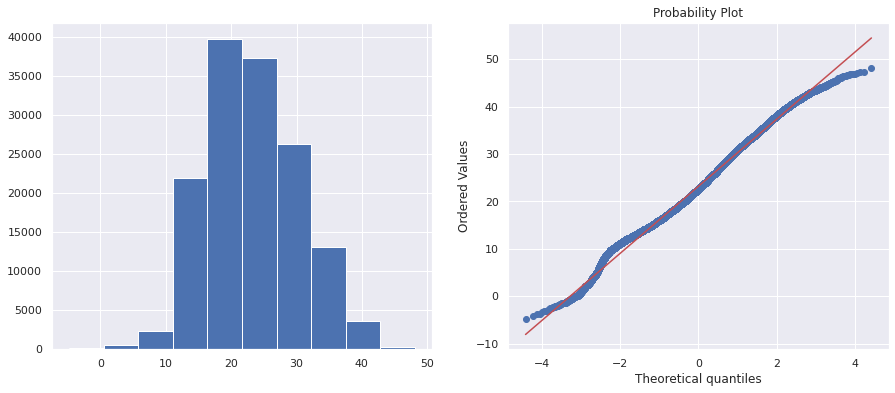

Rainfall


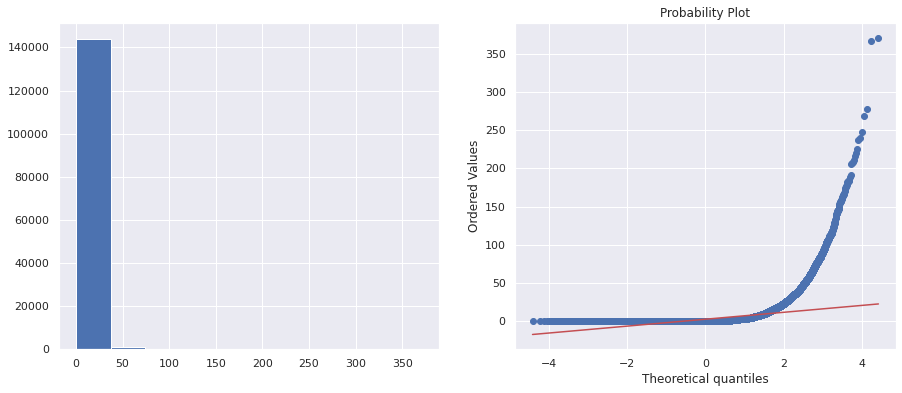

Evaporation


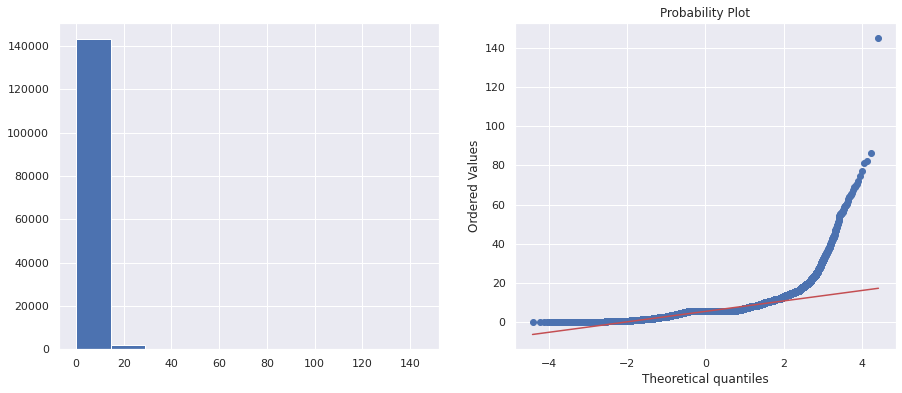

Sunshine


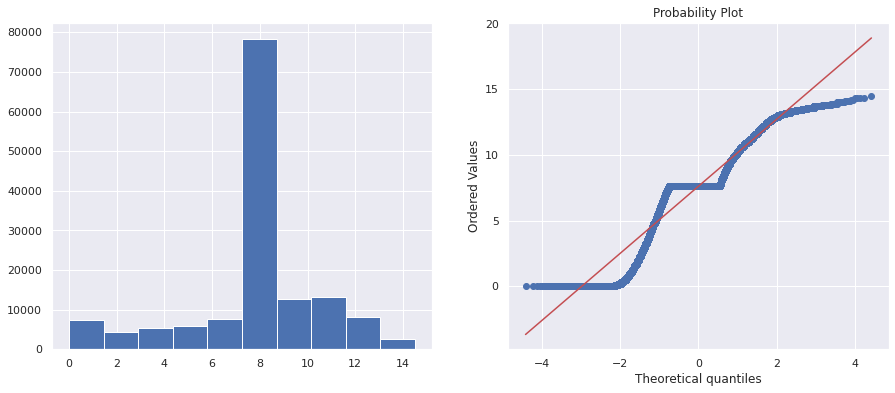

WindGustSpeed


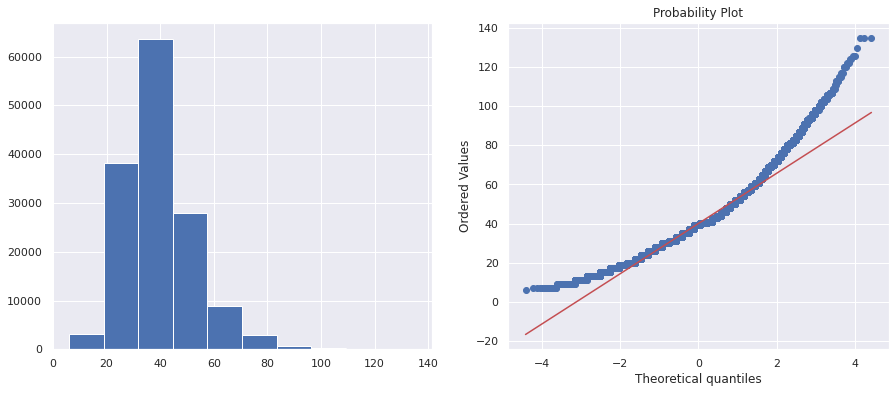

WindSpeed9am


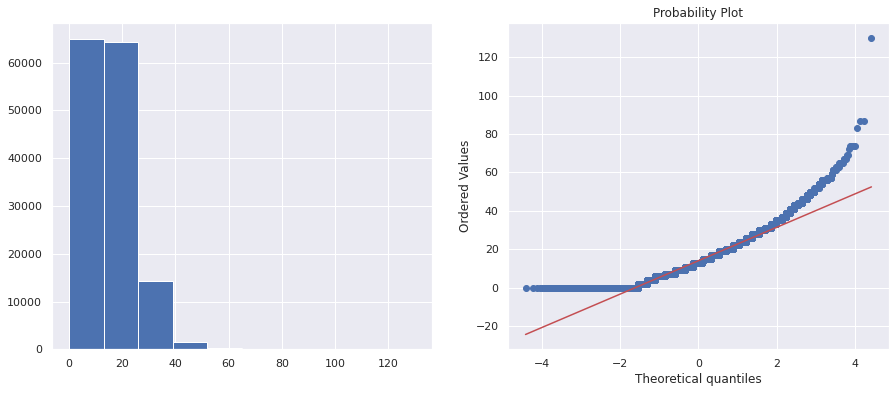

WindSpeed3pm


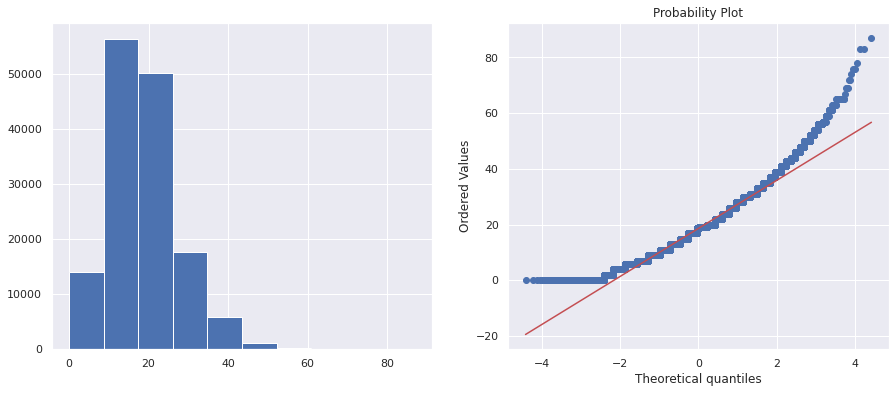

Humidity9am


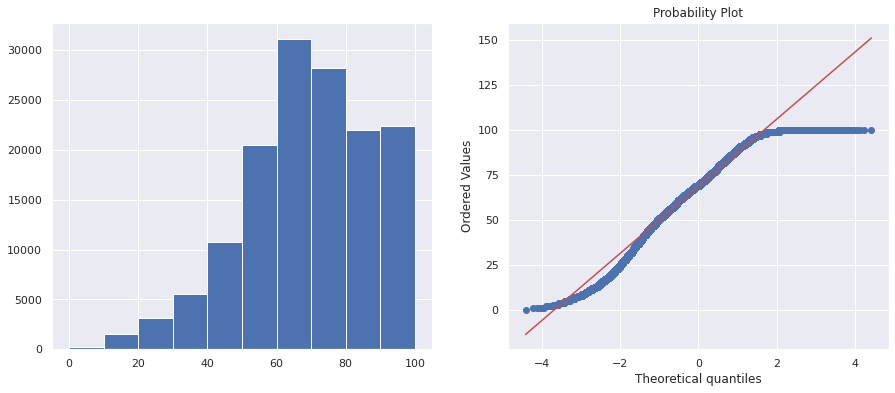

Humidity3pm


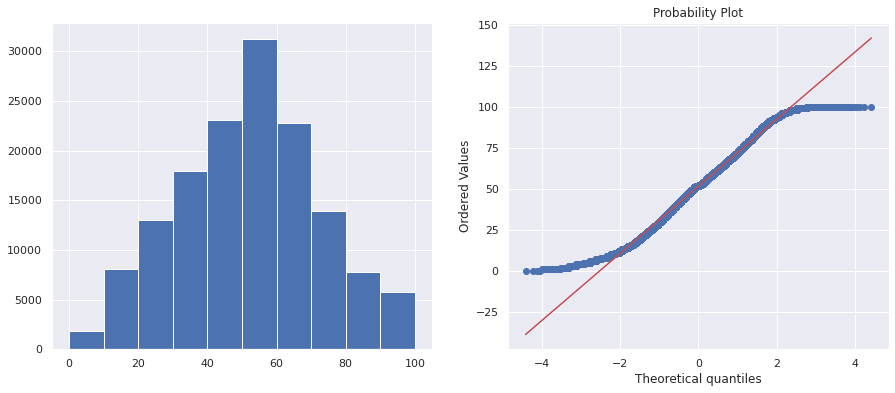

Pressure9am


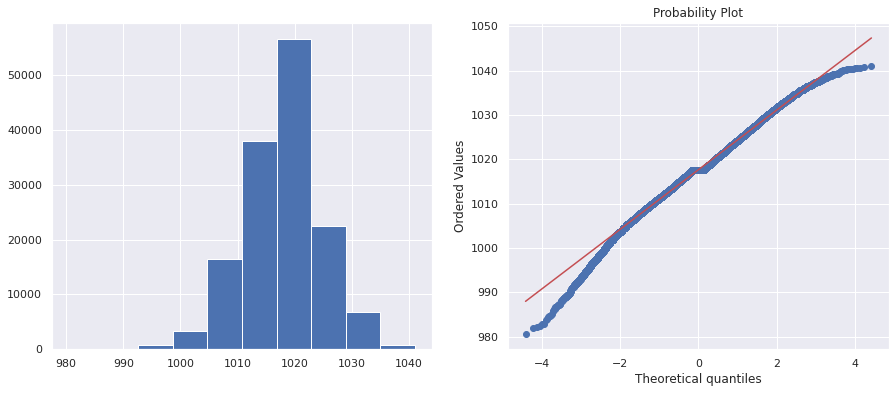

Pressure3pm


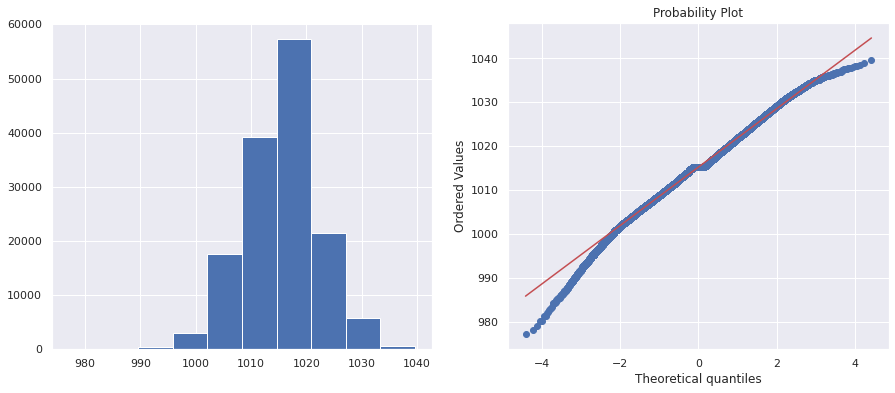

Cloud9am


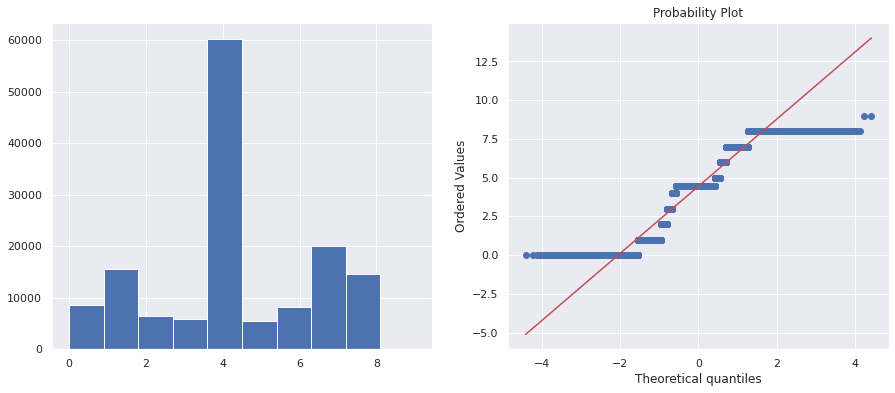

Cloud3pm


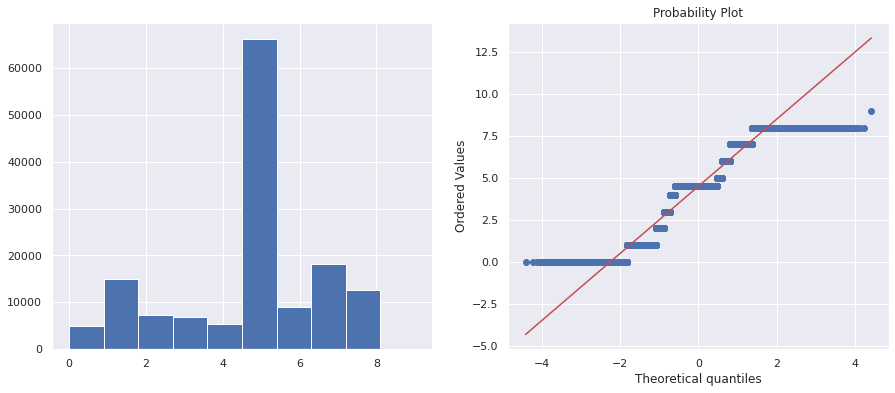

Temp9am


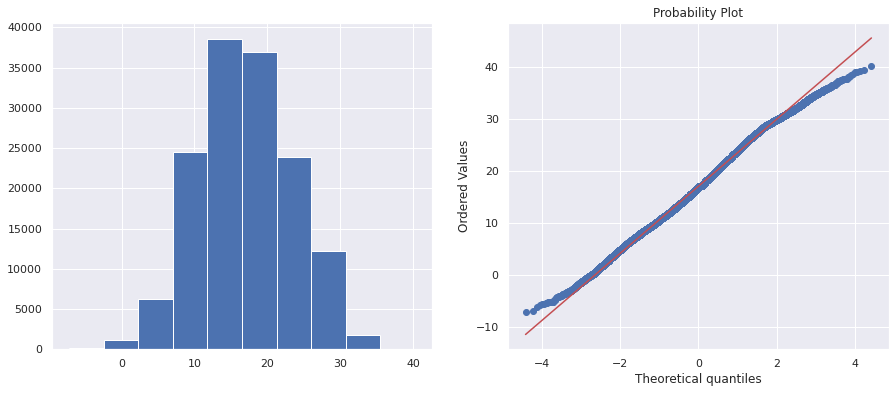

Temp3pm


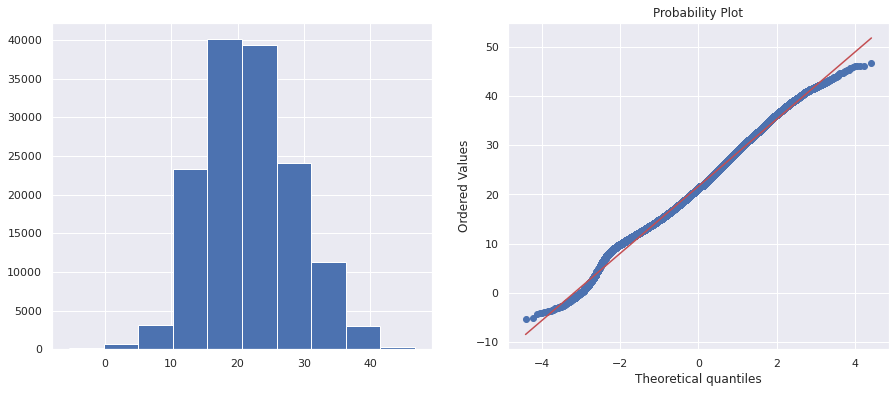

In [160]:
for feature in numeric_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    # when you do subplot(1,2,1); or subplot(121); , you would like to have
    # one row and two columns worth of figures. The last number, p=1 means
    # that you wish to place the plot in the left most column.
    rainfall_dataset[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(rainfall_dataset[feature], dist="norm", plot=plt)
    plt.show()

Text(0.5, 1.0, 'Humidity3pm vs Temp3pm of Rainfall Dataset')

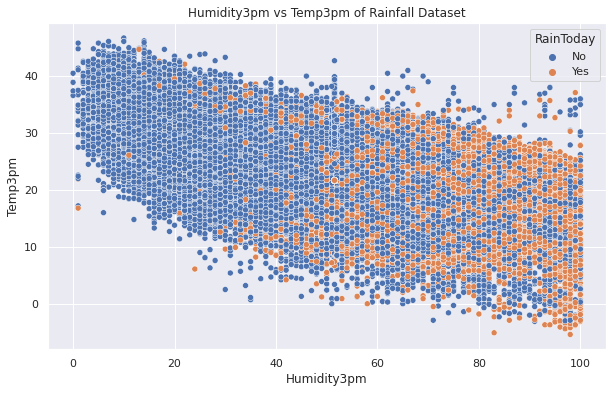

In [161]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='Humidity3pm', y='Temp3pm', data=rainfall_dataset, hue='RainToday')
plt.title('Humidity3pm vs Temp3pm of Rainfall Dataset')

Text(0.5, 1.0, 'Humidity9am vs Temp9am of Rainfall Dataset')

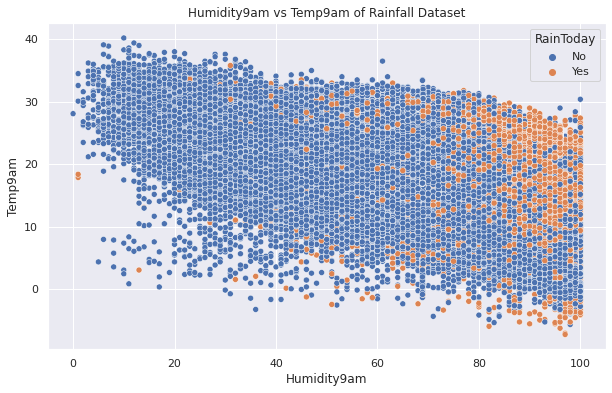

In [162]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='Humidity9am', y='Temp9am', data=rainfall_dataset, hue='RainToday')
plt.title('Humidity9am vs Temp9am of Rainfall Dataset')

Text(0.5, 1.0, 'MaxTemp vs Pressure3pm of Rainfall Dataset')

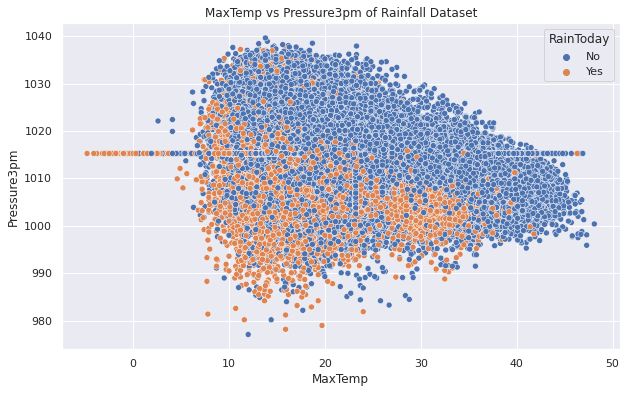

In [163]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='MaxTemp', y='Pressure3pm', data=rainfall_dataset, hue='RainToday')
plt.title('MaxTemp vs Pressure3pm of Rainfall Dataset')

Text(0.5, 1.0, 'MinTemp vs Pressure9am of Rainfall Dataset')

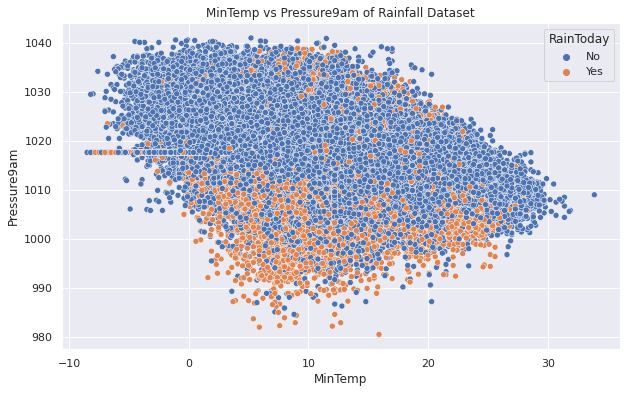

In [164]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='MinTemp', y='Pressure9am', data=rainfall_dataset, hue='RainToday')
plt.title('MinTemp vs Pressure9am of Rainfall Dataset')

Categorical Features

In [165]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [166]:
# Location column values
rainfall_dataset['Location'].value_counts()

Canberra            3436
Sydney              3344
Hobart              3193
Perth               3193
Melbourne           3193
Darwin              3193
Adelaide            3193
Brisbane            3193
Albury              3040
Cairns              3040
Townsville          3040
GoldCoast           3040
Ballarat            3040
MountGambier        3040
Albany              3040
Launceston          3040
Bendigo             3040
AliceSprings        3040
MountGinini         3040
Wollongong          3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Cobar               3009
CoffsHarbour        3009
Moree               3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
Woomera             3009
Nuriootpa           3009
NorfolkIsland       3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Dartmoor            3009
Watsonia            3009
Portland            3009
BadgerysCreek       3009
Williamtown         3009


In [167]:
# WindGustDir column values
rainfall_dataset['WindGustDir'].value_counts()

W      20243
SE      9421
N       9314
SSE     9216
E       9199
S       9170
WSW     9069
SW      8967
SSW     8736
WNW     8253
NW      8122
ENE     8106
ESE     7374
NE      7133
NNW     6621
NNE     6548
Name: WindGustDir, dtype: int64

In [168]:
# WindDir9am column values
rainfall_dataset['WindDir9am'].value_counts()

N      22325
SE      9296
E       9179
SSE     9113
NW      8749
S       8661
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7644
SSW     7589
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [169]:
# WindDir3pm column values
rainfall_dataset['WindDir3pm'].value_counts()

SE     15066
W      10110
S       9927
WSW     9518
SSE     9400
SW      9354
N       8892
WNW     8876
NW      8611
ESE     8513
E       8487
NE      8263
SSW     8156
NNW     7870
ENE     7859
NNE     6590
Name: WindDir3pm, dtype: int64

In [170]:
# RainToday column values
rainfall_dataset['RainToday'].value_counts()

No     113612
Yes     31880
Name: RainToday, dtype: int64

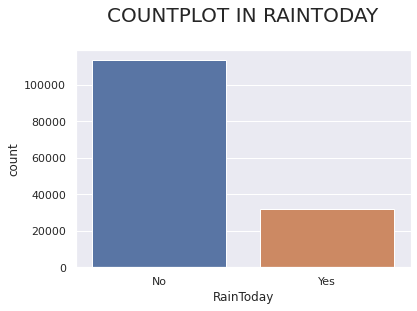

In [171]:
# RainToday
plt.figure(figsize=(6,4))
sns.countplot(x='RainToday', data=rainfall_dataset)
title = 'CountPlot in RainToday\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [172]:
# RainTomorrow column values
rainfall_dataset['RainTomorrow'].value_counts()

No     113615
Yes     31877
Name: RainTomorrow, dtype: int64

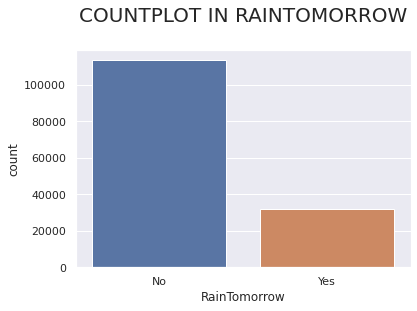

In [173]:
# RainTomorrow
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=rainfall_dataset)
title = 'CountPlot in RainTomorrow\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

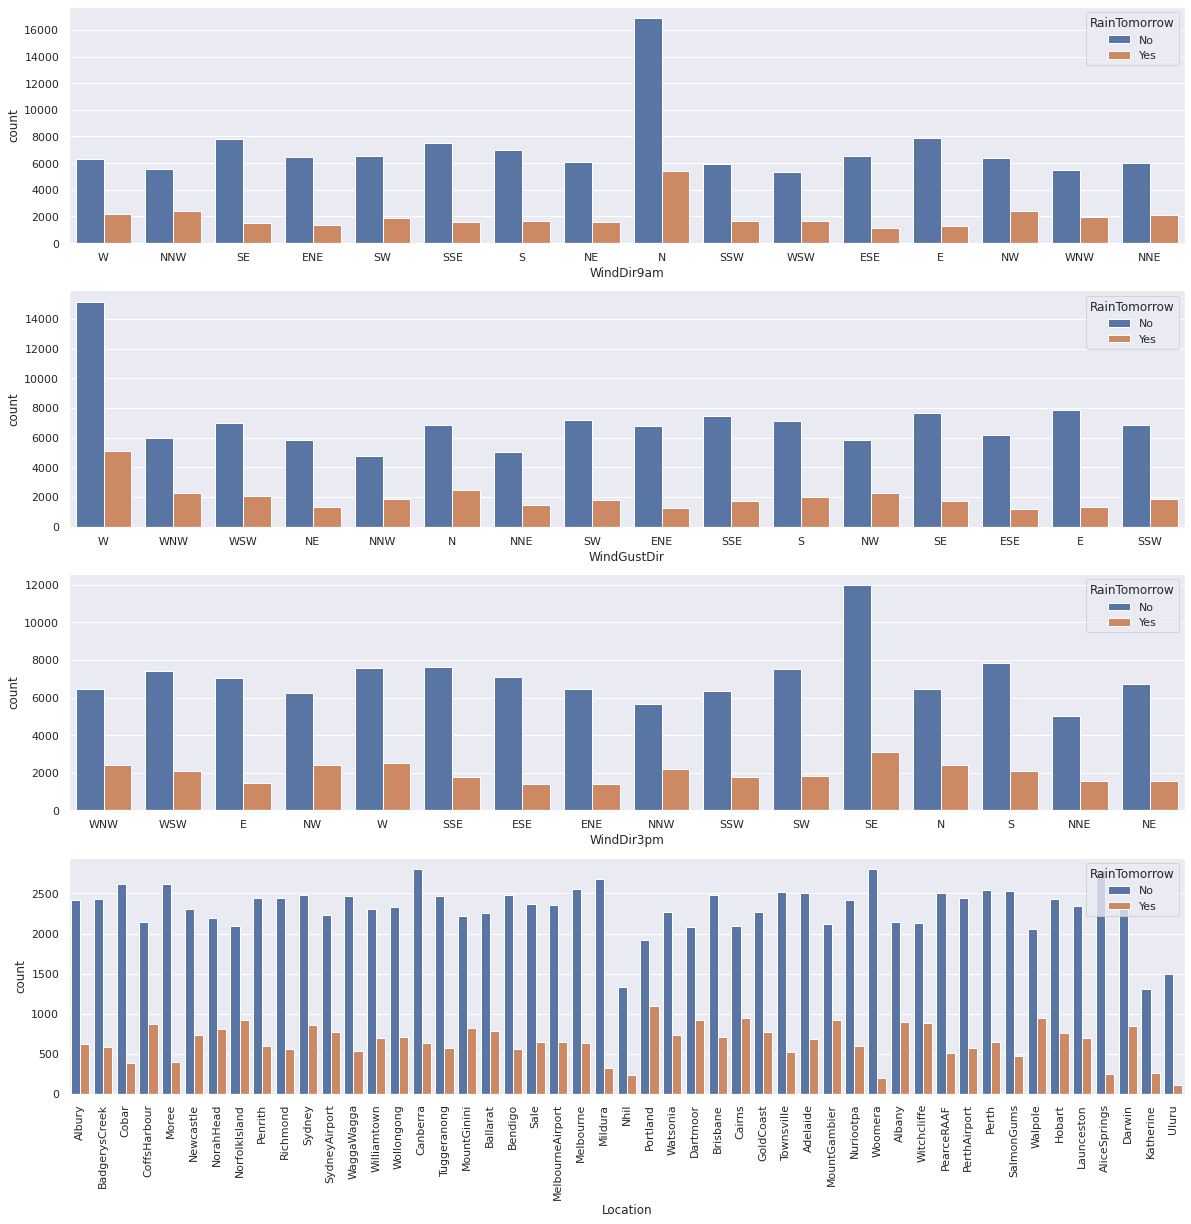

In [174]:
plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
sns.countplot(x=rainfall_dataset.WindDir9am,hue=rainfall_dataset.RainTomorrow)

plt.subplot(4,1,2)
sns.countplot(x=rainfall_dataset.WindGustDir,hue=rainfall_dataset.RainTomorrow)

plt.subplot(4,1,3)
sns.countplot(x=rainfall_dataset.WindDir3pm,hue=rainfall_dataset.RainTomorrow)

plt.subplot(4,1,4)
plt.xticks(rotation=90)
sns.countplot(x=rainfall_dataset.Location,hue=rainfall_dataset.RainTomorrow)

plt.show()

Understanding the correlation between various features in the dataset

In [175]:
correlation = rainfall_dataset.corr()

In [176]:
print(correlation)

                MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
MinTemp        1.000000  0.733335  0.102752  ...  0.016722  0.897707  0.699131
MaxTemp        0.733335  1.000000 -0.074029  ... -0.212756  0.879112  0.968712
Rainfall       0.102752 -0.074029  1.000000  ...  0.145330  0.011126 -0.077679
Evaporation    0.351268  0.438645 -0.037863  ... -0.145466  0.414545  0.425565
Sunshine       0.051290  0.328925 -0.170972  ... -0.553829  0.208556  0.346679
WindGustSpeed  0.172603  0.065883  0.126461  ...  0.079927  0.145946  0.031865
WindSpeed9am   0.173360  0.014267  0.085920  ...  0.041659  0.127554  0.004448
WindSpeed3pm   0.173058  0.049688  0.056534  ...  0.019817  0.161053  0.027555
Humidity9am   -0.230691 -0.497833  0.221406  ...  0.273270 -0.469350 -0.490633
Humidity3pm    0.006295 -0.498616  0.248933  ...  0.406495 -0.216628 -0.555478
Pressure9am   -0.423767 -0.308328 -0.159099  ... -0.114376 -0.397312 -0.265535
Pressure3pm   -0.433301 -0.396633 -0.119588  ... -0.

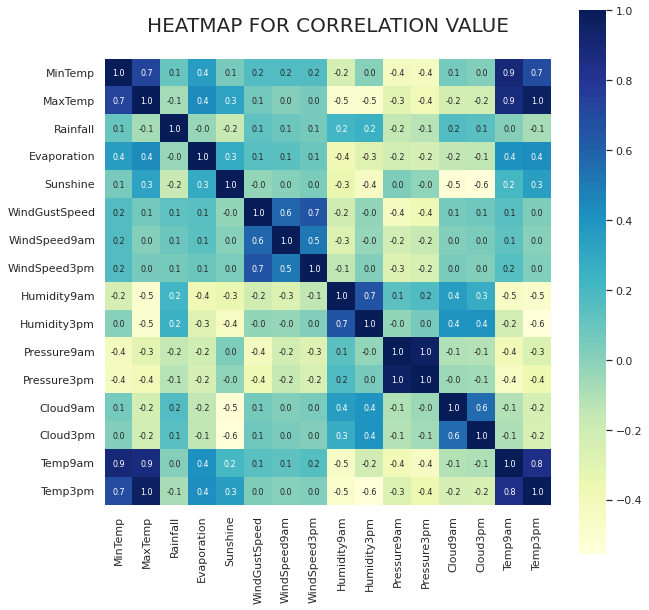

In [177]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [178]:
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.509993,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447583,4.509993,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447583,2.000000,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447583,4.509993,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [179]:
# convert categorical values to numerical values

rainfall_dataset.replace({'WindGustDir': {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 
                                          'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15},}, inplace=True)

rainfall_dataset.replace({'WindDir9am': {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 
                                         'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15},}, inplace=True)

rainfall_dataset.replace({'WindDir3pm': {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 
                                         'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15},}, inplace=True)

In [180]:
rd = rainfall_dataset.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
rd

RainTomorrow,No,Yes
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [181]:
print("Number of Location: ", len(rainfall_dataset['Location'].unique()))

Number of Location:  49


In [182]:
# convert categorical values to numerical values

rainfall_dataset.replace({'Location': {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,'NorfolkIsland':6,
                                       'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10, 'Darwin':11, 'MountGinini':12, 
                                       'NorahHead':13, 'Ballarat':14, 'GoldCoast':15, 'SydneyAirport':16, 'Hobart':17, 'Watsonia':18,
                                       'Newcastle':19, 'Wollongong':20, 'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24,
                                       'MelbourneAirport':25, 'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
                                       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36, 'Richmond':37,
                                       'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41, 'Moree':42, 'Cobar':43, 'Mildura':44, 
                                       'Katherine':45, 'AliceSprings':46, 'Nhil':47, 'Woomera':48, 'Uluru':49},}, inplace=True)

Label Encoding

In [183]:
encoder = LabelEncoder()

In [184]:
# convert categorical columns to numerical values

rainfall_dataset['RainToday'] = encoder.fit_transform(rainfall_dataset['RainToday'])

rainfall_dataset['RainTomorrow'] = encoder.fit_transform(rainfall_dataset['RainTomorrow'])

After label Encoding

RainToday: 
  1.   NO = 0
  2.   YES = 1

RainTomorrow: 
  1.   NO = 0
  2.   YES = 1

In [185]:
rainfall_dataset['Date'] =pd.to_datetime(rainfall_dataset['Date'])
rainfall_dataset['Date'] = rainfall_dataset['Date'].values.astype(float)
# df2
rainfall_dataset['Date']

0         1.228090e+18
1         1.228176e+18
2         1.228262e+18
3         1.228349e+18
4         1.228435e+18
              ...     
145487    1.498003e+18
145488    1.498090e+18
145489    1.498176e+18
145490    1.498262e+18
145491    1.498349e+18
Name: Date, Length: 145492, dtype: float64

In [186]:
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.228090e+18,30,13.4,22.9,0.6,5.468232,7.611178,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.509993,16.9,21.8,0,0
1,1.228176e+18,30,7.4,25.1,0.0,5.468232,7.611178,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447583,4.509993,17.2,24.3,0,0
2,1.228262e+18,30,12.9,25.7,0.0,5.468232,7.611178,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447583,2.000000,21.0,23.2,0,0
3,1.228349e+18,30,9.2,28.0,0.0,5.468232,7.611178,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447583,4.509993,18.1,26.5,0,0
4,1.228435e+18,30,17.5,32.3,1.0,5.468232,7.611178,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [187]:
rainfall_dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.228090e+18,30,13.4,22.9,0.6,5.468232,7.611178,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.509993,16.9,21.8,0,0
1,1.228176e+18,30,7.4,25.1,0.0,5.468232,7.611178,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447583,4.509993,17.2,24.3,0,0
2,1.228262e+18,30,12.9,25.7,0.0,5.468232,7.611178,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447583,2.000000,21.0,23.2,0,0
3,1.228349e+18,30,9.2,28.0,0.0,5.468232,7.611178,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447583,4.509993,18.1,26.5,0,0
4,1.228435e+18,30,17.5,32.3,1.0,5.468232,7.611178,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
5,1.228522e+18,30,14.6,29.7,0.2,5.468232,7.611178,2,56.0,5,4,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447583,4.509993,20.6,28.9,0,0
6,1.228608e+18,30,14.3,25.0,0.0,5.468232,7.611178,4,50.0,7,4,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.509993,18.1,24.6,0,0
7,1.228694e+18,30,7.7,26.7,0.0,5.468232,7.611178,4,35.0,11,4,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447583,4.509993,16.3,25.5,0,0
8,1.228781e+18,30,9.7,31.9,0.0,5.468232,7.611178,0,80.0,13,0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447583,4.509993,18.3,30.2,0,1
9,1.228867e+18,30,13.1,30.1,1.4,5.468232,7.611178,4,28.0,10,12,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447583,4.509993,20.1,28.2,1,0


In [188]:
# Location column values
rainfall_dataset['Location'].value_counts()

29    3436
10    3344
17    3193
26    3193
28    3193
11    3193
24    3193
21    3193
30    3040
2     3040
39    3040
15    3040
14    3040
5     3040
7     3040
23    3040
36    3040
46    3040
12    3040
20    3040
31    3039
19    3039
34    3039
43    3009
9     3009
42    3009
35    3009
40    3009
8     3009
48    3009
32    3009
6     3009
37    3009
16    3009
38    3009
4     3009
18    3009
1     3009
33    3009
22    3009
25    3009
27    3009
44    3009
3     3006
13    3004
41    3001
49    1610
45    1578
47    1578
Name: Location, dtype: int64

In [189]:
# WindGustDir column values
rainfall_dataset['WindGustDir'].value_counts()

4     20243
12     9421
3      9314
10     9216
15     9199
7      9170
5      9069
9      8967
8      8736
2      8253
1      8122
14     8106
13     7374
11     7133
0      6621
6      6548
Name: WindGustDir, dtype: int64

In [190]:
# WindDir9am column values
rainfall_dataset['WindDir9am'].value_counts()

1     22325
13     9296
15     9179
11     9113
2      8749
10     8661
5      8459
7      8423
3      8129
0      7980
12     7836
9      7671
14     7644
8      7589
4      7414
6      7024
Name: WindDir9am, dtype: int64

In [191]:
# WindDir3pm column values
rainfall_dataset['WindDir3pm'].value_counts()

10    15066
4     10110
8      9927
6      9518
12     9400
9      9354
2      8892
3      8876
0      8611
15     8513
14     8487
11     8263
7      8156
1      7870
13     7859
5      6590
Name: WindDir3pm, dtype: int64

In [192]:
# RainToday column values
rainfall_dataset['RainToday'].value_counts()

0    113612
1     31880
Name: RainToday, dtype: int64

In [193]:
# RainTomorrow column values
rainfall_dataset['RainTomorrow'].value_counts()

0    113615
1     31877
Name: RainTomorrow, dtype: int64

Splitting the data set

In [194]:
X = rainfall_dataset.drop(['Date', 'RainTomorrow'], axis=1)
Y = rainfall_dataset['RainTomorrow']

In [195]:
print(X)

        Location  MinTemp    MaxTemp  ...  Temp9am  Temp3pm  RainToday
0             30     13.4  22.900000  ...     16.9     21.8          0
1             30      7.4  25.100000  ...     17.2     24.3          0
2             30     12.9  25.700000  ...     21.0     23.2          0
3             30      9.2  28.000000  ...     18.1     26.5          0
4             30     17.5  32.300000  ...     17.8     29.7          0
...          ...      ...        ...  ...      ...      ...        ...
145487        49      2.8  23.400000  ...     10.1     22.4          0
145488        49      3.6  25.300000  ...     10.9     24.5          0
145489        49      5.4  26.900000  ...     12.5     26.1          0
145490        49      7.8  27.000000  ...     15.1     26.0          0
145491        49     14.9  23.221127  ...     15.0     20.9          0

[145492 rows x 21 columns]


In [196]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
145487    0
145488    0
145489    0
145490    0
145491    0
Name: RainTomorrow, Length: 145492, dtype: int64


Splitting the data into Training data & Testing Data

In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [198]:
print(X.shape, X_train.shape, X_test.shape)

(145492, 21) (101844, 21) (43648, 21)


Machine Learning Model Training

Random Forest

In [199]:
# from sklearn.ensemble import RandomForestClassifier
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

Evaluation

training data

In [200]:
random_forest_train_predictions=clf_random_forest.predict(X_train)

In [201]:
# Accuracy Score
accuracy_random_forest_on_train_data = accuracy_score(Y_train,random_forest_train_predictions)*100

In [202]:
print('Accuracy on train data : ', accuracy_random_forest_on_train_data)

Accuracy on train data :  99.99116295510781


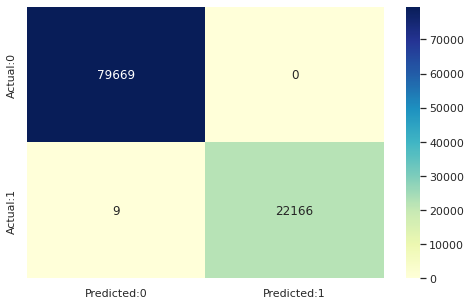

In [203]:
cm=confusion_matrix(Y_train,random_forest_train_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [204]:
print("Classification Report:", "\n", metrics.classification_report(Y_train, random_forest_train_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     79669
           1       1.00      1.00      1.00     22175

    accuracy                           1.00    101844
   macro avg       1.00      1.00      1.00    101844
weighted avg       1.00      1.00      1.00    101844



testing data

In [205]:
random_forest_text_predictions=clf_random_forest.predict(X_test)

In [206]:
# Accuracy Score
accuracy_random_forest_on_test_data = accuracy_score(Y_test,random_forest_text_predictions)*100

In [207]:
print('Accuracy on test data : ', accuracy_random_forest_on_test_data)

Accuracy on test data :  85.48616202346041


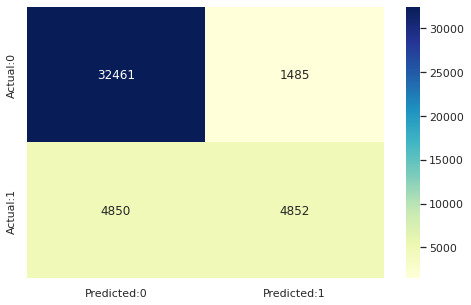

In [208]:
cm=confusion_matrix(Y_test,random_forest_text_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [209]:
print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy on test data : ', accuracy_random_forest_on_test_data, "\n")
print("Classification Report:", "\n", metrics.classification_report(Y_test, random_forest_text_predictions))

Confusion matrix : 
 [[32461  1485]
 [ 4850  4852]] 

Accuracy on test data :  85.48616202346041 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     33946
           1       0.77      0.50      0.61      9702

    accuracy                           0.85     43648
   macro avg       0.82      0.73      0.76     43648
weighted avg       0.85      0.85      0.84     43648



In [210]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.1451383797653959
Mean_squared_error:  0.1451383797653959
Root mean_squared_error:  0.3809703134962039


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7281785610412589

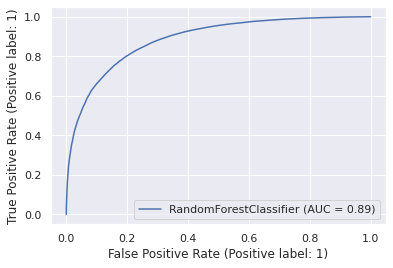

In [211]:
# Receiver Operating Characteristic Curve(Roc curve)
# Area under the ROC Curve
metrics.plot_roc_curve(clf_random_forest, X_test, Y_test)
metrics.roc_auc_score(Y_test, random_forest_text_predictions, average=None)

CatBoostClassifier

In [212]:
# from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.074186
0:	learn: 0.6425926	total: 30.9ms	remaining: 30.9s
1:	learn: 0.5982538	total: 57.9ms	remaining: 28.9s
2:	learn: 0.5635750	total: 86.9ms	remaining: 28.9s
3:	learn: 0.5316808	total: 115ms	remaining: 28.7s
4:	learn: 0.5055173	total: 144ms	remaining: 28.7s
5:	learn: 0.4855079	total: 172ms	remaining: 28.4s
6:	learn: 0.4666130	total: 205ms	remaining: 29s
7:	learn: 0.4531765	total: 236ms	remaining: 29.3s
8:	learn: 0.4416027	total: 265ms	remaining: 29.2s
9:	learn: 0.4313610	total: 294ms	remaining: 29.1s
10:	learn: 0.4218108	total: 323ms	remaining: 29.1s
11:	learn: 0.4144975	total: 353ms	remaining: 29.1s
12:	learn: 0.4074960	total: 384ms	remaining: 29.2s
13:	learn: 0.4013871	total: 421ms	remaining: 29.7s
14:	learn: 0.3962141	total: 453ms	remaining: 29.7s
15:	learn: 0.3917335	total: 481ms	remaining: 29.6s
16:	learn: 0.3881555	total: 515ms	remaining: 29.8s
17:	learn: 0.3855607	total: 545ms	remaining: 29.7s
18:	learn: 0.3824218	total: 575ms	remaining: 29.7s
19:	learn:

In [213]:
cat_pred = cat.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,cat_pred))

Confusion matrix : 
 [[32391  1555]
 [ 4438  5264]] 

Accuracy Score :  86.26970307917888 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92     33946
           1       0.77      0.54      0.64      9702

    accuracy                           0.86     43648
   macro avg       0.83      0.75      0.78     43648
weighted avg       0.86      0.86      0.85     43648



In [214]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.13730296920821114
Mean_squared_error:  0.13730296920821114
Root mean_squared_error:  0.3705441528457994


ROC : <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f7976fc5750>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7483802472460931

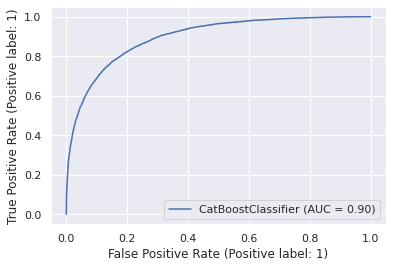

In [215]:
print("ROC :", metrics.plot_roc_curve(cat, X_test, Y_test))
metrics.roc_auc_score(Y_test, cat_pred, average=None)

XGBClassifier

In [216]:
# from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier()

In [217]:
xgb_pred = xgb.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,xgb_pred))

Confusion matrix : 
 [[32413  1533]
 [ 5077  4625]] 

Accuracy Score :  84.85612170087975 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     33946
           1       0.75      0.48      0.58      9702

    accuracy                           0.85     43648
   macro avg       0.81      0.72      0.75     43648
weighted avg       0.84      0.85      0.84     43648



In [218]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.15143878299120234
Mean_squared_error:  0.15143878299120234
Root mean_squared_error:  0.3891513625714323


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7157729369561606

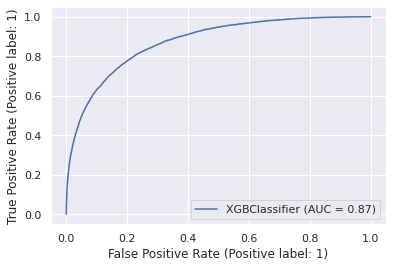

In [219]:
metrics.plot_roc_curve(xgb, X_test, Y_test)
metrics.roc_auc_score(Y_test, xgb_pred, average=None)

LogisticRegression

In [220]:
# from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [221]:
log_reg_pred = log_reg.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,log_reg_pred))

Confusion matrix : 
 [[32197  1749]
 [ 5162  4540]] 

Accuracy Score :  84.16651392961877 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     33946
           1       0.72      0.47      0.57      9702

    accuracy                           0.84     43648
   macro avg       0.79      0.71      0.74     43648
weighted avg       0.83      0.84      0.83     43648



In [222]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.1583348607038123
Mean_squared_error:  0.1583348607038123
Root mean_squared_error:  0.39791313210776585


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7082108732650348

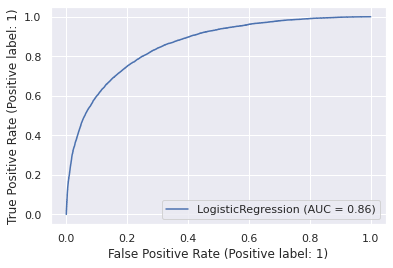

In [223]:
metrics.plot_roc_curve(log_reg, X_test, Y_test)
metrics.roc_auc_score(Y_test, log_reg_pred, average=None)

GaussianNB

In [224]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [225]:
gnb_pred = gnb.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,gnb_pred))

Confusion matrix : 
 [[29235  4711]
 [ 3802  5900]] 

Accuracy Score :  80.4962426686217 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     33946
           1       0.56      0.61      0.58      9702

    accuracy                           0.80     43648
   macro avg       0.72      0.73      0.73     43648
weighted avg       0.81      0.80      0.81     43648



In [226]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.195037573313783
Mean_squared_error:  0.195037573313783
Root mean_squared_error:  0.4416305846675284


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7346713995403932

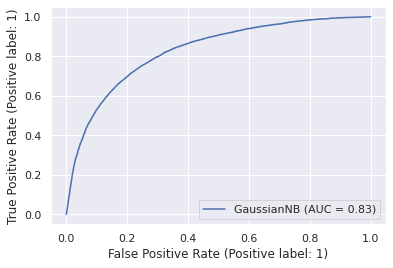

In [227]:
metrics.plot_roc_curve(gnb, X_test, Y_test)
metrics.roc_auc_score(Y_test, gnb_pred, average=None)

KNeighborsClassifier

In [228]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [229]:
knn_pred = knn.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,knn_pred))

Confusion matrix : 
 [[31782  2164]
 [ 4930  4772]] 

Accuracy Score :  83.74725073313783 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     33946
           1       0.69      0.49      0.57      9702

    accuracy                           0.84     43648
   macro avg       0.78      0.71      0.74     43648
weighted avg       0.83      0.84      0.83     43648



In [230]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.1625274926686217
Mean_squared_error:  0.1625274926686217
Root mean_squared_error:  0.40314698643127883


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7140545214334678

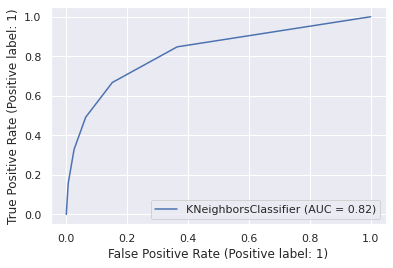

In [231]:
metrics.plot_roc_curve(knn, X_test, Y_test)
metrics.roc_auc_score(Y_test, knn_pred, average=None)

DecisionTreeClassifier

In [232]:
# from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [233]:
dtc_pred = dtc.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,dtc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,dtc_pred))

Confusion matrix : 
 [[29145  4801]
 [ 4497  5205]] 

Accuracy Score :  78.69776392961877 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86     33946
           1       0.52      0.54      0.53      9702

    accuracy                           0.79     43648
   macro avg       0.69      0.70      0.70     43648
weighted avg       0.79      0.79      0.79     43648



In [234]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, dtc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, dtc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, dtc_pred))))

Mean_absolute_error:  0.2130223607038123
Mean_squared_error:  0.2130223607038123
Root mean_squared_error:  0.4615434548380166


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6975284074626728

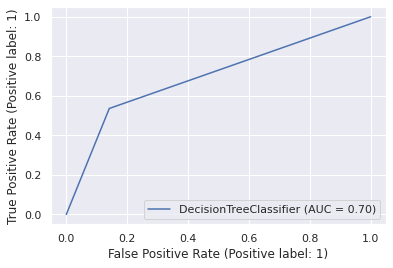

In [235]:
metrics.plot_roc_curve(dtc, X_test, Y_test)
metrics.roc_auc_score(Y_test, dtc_pred, average=None)

LightGBM Model

In [236]:
# build the lightgbm model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

In [237]:
lgb_predictions=lgb_model.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,lgb_predictions),'\n')
# Accuracy Score
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test, lgb_predictions))

Confusion matrix : 
 [[32293  1653]
 [ 4567  5135]] 

Accuracy Score :  85.74963343108504 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     33946
           1       0.76      0.53      0.62      9702

    accuracy                           0.86     43648
   macro avg       0.82      0.74      0.77     43648
weighted avg       0.85      0.86      0.85     43648



In [238]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, lgb_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, lgb_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))))

Mean_absolute_error:  0.14250366568914957
Mean_squared_error:  0.14250366568914957
Root mean_squared_error:  0.3774965770562027


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.74028866441606

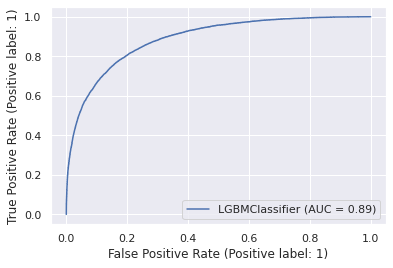

In [239]:
metrics.plot_roc_curve(lgb_model, X_test, Y_test)
metrics.roc_auc_score(Y_test, lgb_predictions, average=None)

Support Vector Clustering (SVC)

In [240]:
# from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [241]:
svc_pred = svc.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,svc_pred))

Confusion matrix : 
 [[32968   978]
 [ 6234  3468]] 

Accuracy Score :  83.47690615835776 

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     33946
           1       0.78      0.36      0.49      9702

    accuracy                           0.83     43648
   macro avg       0.81      0.66      0.70     43648
weighted avg       0.83      0.83      0.81     43648



In [242]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  0.16523093841642228
Mean_squared_error:  0.16523093841642228
Root mean_squared_error:  0.4064860863749487


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6643208040300902

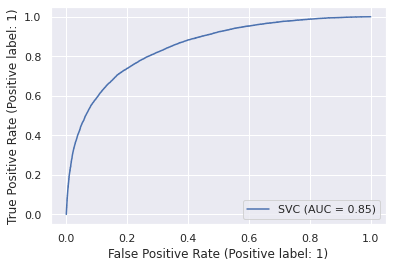

In [243]:
metrics.plot_roc_curve(svc, X_test, Y_test)
metrics.roc_auc_score(Y_test, svc_pred, average=None)

In [244]:
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')

Accuracy Score :  85.74963343108504 

Accuracy Score :  85.48616202346041 

Accuracy Score :  86.26970307917888 

Accuracy Score :  84.85612170087975 

Accuracy Score :  84.16651392961877 

Accuracy Score :  80.4962426686217 

Accuracy Score :  83.74725073313783 

Accuracy Score :  78.69776392961877 

Accuracy Score :  83.47690615835776 



In [ ]:
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [ ]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import xgboost
import catboost
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    catboost.CatBoostClassifier(),

    xgboost.XGBClassifier(),

    lgb.LGBMClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),

    #Trees    
    tree.DecisionTreeClassifier(),
    
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    # fp, tp, th  = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    # MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

In [ ]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [ ]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='cool_r',edgecolor=sns.color_palette("dark", 8))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()